In [22]:
import os
import util.feature_util as feat
import pandas as pd
import numpy as np
from scipy.special import entr
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
src_path = "../clean_imgs/"

In [3]:
image_type = ".jpg", ".jpeg"
 
image_paths = []  
for root, dirs, files in os.walk(src_path):
    image_paths.extend([os.path.join(root, f) for f in files if f.endswith(image_type)])

In [4]:
imgs = feat.DimTransformer(w = 100, h = 100).transform(image_paths)

In [5]:
HueHist = feat.HSVHistTransformer(hist_type = "hue")
SatHist = feat.HSVHistTransformer(hist_type = "sat")
ValHist = feat.HSVHistTransformer(hist_type = "val")
hue_hists = HueHist.transform(imgs)
sat_hists = SatHist.transform(imgs)
val_hists = ValHist.transform(imgs)
print hue_hists.shape
print sat_hists.shape
print val_hists.shape

(624, 180)
(624, 256)
(624, 256)


In [6]:
def compute_summary_stats(hue_hists, sat_hists, val_hists):
    hue_modes = np.argmax(hue_hists, 1)
    sat_modes = np.argmax(sat_hists, 1)
    val_modes = np.argmax(val_hists, 1)
    
    hue_ent = entr(hue_hists).sum(axis=1)
    sat_ent = entr(sat_hists).sum(axis=1)
    val_ent = entr(val_hists).sum(axis=1)
    
    df = pd.DataFrame({'H.mode': hue_modes, 'S.mode': sat_modes, 'V.mode': val_modes,
                      'H.entropy': hue_ent, 'S.entropy': sat_ent, 'V.entropy': val_ent})
    return df

In [7]:
df_img_stats = compute_summary_stats(hue_hists, sat_hists, val_hists)
df_img_stats.insert(0, 'img.path', image_paths)

In [8]:
df_img_stats.head()

,img.path,H.entropy,H.mode,S.entropy,S.mode,V.entropy,V.mode
0,../clean_imgs/playboy_imgs/Playboy - 1953 - co...,4.893978,78,4.436550,252,4.300640,251
1,../clean_imgs/playboy_imgs/Playboy - 1954-01 -...,5.007125,129,5.242922,244,5.190052,249
2,../clean_imgs/playboy_imgs/Playboy - 1954-02 -...,4.153385,1,4.683984,1,4.625514,1
3,../clean_imgs/playboy_imgs/Playboy - 1954-03 -...,3.888695,31,4.117445,88,4.086222,184
4,../clean_imgs/playboy_imgs/Playboy - 1954-04 -...,5.027592,173,5.098360,234,5.071385,231


In [9]:
#df_img_stats.to_csv("../data/image_stats_playboy.csv", index = False)

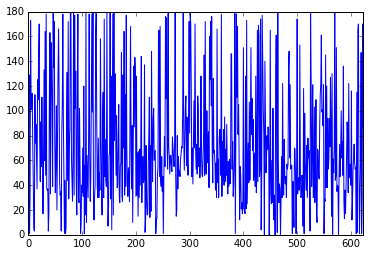

In [34]:
df_img_stats["H.mode"].plot()

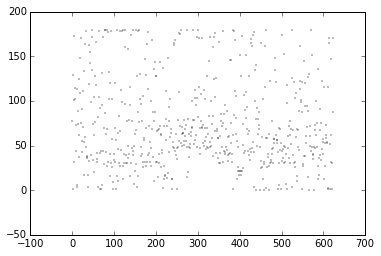

In [33]:
plt.scatter(range(len(df_img_stats)), df_img_stats["H.mode"], s = .1)

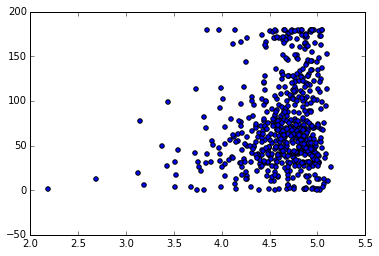

In [49]:
plt.scatter(df_img_stats["H.entropy"], df_img_stats["H.mode"])